In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [2]:
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/vcf_filtering/Qpetraea/raw_SNP.vcf.gz', '/users/mcevoysu/scratch/output/scikit-allel/Qpetraea/raw_SNP.h5', fields='*')

## Get data

In [3]:
callset_var_fn = '/users/mcevoysu/scratch/output/scikit-allel/Qpetraea/raw_SNP.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [4]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [5]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [6]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(859843,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=146.8M cbytes=32.6M cratio=4.5
   values=h5py._hl.group.Group>

In [7]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(568516,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 6, -1, -1], [0.009036,      nan,      nan], [b'A', b'', b''], 658, nan, b'Qrob_Chr01',  32, -1, 0., False, False, 0., b'.', 0.3347, [73, -1, -1], [0.11 ,   nan,   nan], 60.  ,    nan, 44599, 25.36, 459.42, [-1, -1], b'G',    nan, 3.258, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.003012,      nan,      nan], [b'T', b'', b''], 658, nan, b'Qrob_Chr01',  99, -1, 0., False, False, 0., b'.', 0.3358, [11, -1, -1], [0.017,   nan,   nan], 47.61,    nan, 44665, 28.2 , 113.77, [-1, -1], b'A',    nan, 1.179, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.003012,      nan,      nan], [b'G', b'', b''], 658, nan, b'Qrob_Chr01', 111, -1, 0., False, False, 0., b'.', 0.34  , [ 8, -1, -1], [0.012,   nan,   nan], 40.  ,    nan, 44680, 25.  ,  54.95, [-1, -1], b'A',    nan, 1.609, [0, 0, 0],  True, 1)
 ...
 ([ 2, -1, -1], [0.003012,      nan,      nan], [b'A', b'', b''], 658, nan, b'Qrob_H2.3_Sc0001194',  42, -1, 0., False, False, 0., b'.', 0.3407, [21, -1, -1], [0.032,   nan,   nan], 43.  ,    nan, 24454, 30.97,  99.35, [-1, -1], b'G',    nan, 1.609, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.003012,      nan,      nan], [b'G', b'', b''], 658, nan, b'Qrob_H2.3_Sc0001194', 149, -1, 0., False, False, 0., b'.', 0.3468, [19, -1, -1], [0.029,   nan,   nan], 23.  ,    nan, 24547, 27.24,  90.02, [-1, -1], b'A',    nan, 1.609, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001506,      nan,      nan], [b'C', b'', b''], 658,  0., b'Qrob_H2.3_Sc0001194', 152, -1, 0., False, False, 0., b'.', 0.3405, [11, -1, -1], [0.017,   nan,   nan], 47.25, -0.674, 24550, 16.41,  65.65, [-1, -1], b'T', -0.431, 0.693, [0, 0, 0],  True, 1)]

In [8]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

<VariantTable shape=(291327,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([  5,  -1,  -1], [0.00753 ,      nan,      nan], [b'*', b'', b''], 658,    nan, b'Qrob_Chr01',  336, -1, 0.    ,  True, False,  0.   , b'.', 0.3849, [ 12,  -1,  -1], [0.018   ,      nan,      nan],  nan, nan, 58516, 0., 0.  , [-1, -1], b'C',   nan, 0.693, [-1,  0,  0], False, 1)
 ([ 76,  -1,  -1], [0.115   ,      nan,      nan], [b'*', b'', b''], 656,    nan, b'Qrob_Chr01',  334, -1, 0.    ,  True, False,  0.   , b'.', 0.3247, [309,  -1,  -1], [0.467   ,      nan,      nan],  nan, nan, 58550, 0., 0.  , [-1, -1], b'T',   nan, 4.434, [-1,  0,  0], False, 1)
 ([ 67,  -1,  -1], [0.101   ,      nan,      nan], [b'*', b'', b''], 658,    nan, b'Qrob_Chr01',  334, -1, 0.    ,  True, False,  0.   , b'.', 0.3318, [267,  -1,  -1], [0.402   ,      nan,      nan],  nan, nan, 58551, 0., 0.  , [-1, -1], b'T',   nan, 4.587, [-1,  0,  0], False, 1)
 ...
 ([  2,  -1,  -1], [0.003012,      nan,      nan], [b'*', b'', b''], 658, -0.862, b'Qrob_H2.3_Sc0001028', 6502, -1, 0.007 ,  True, False, 10.442, b'.', 0.4459, [  2,  -1,  -1], [0.003012,      nan,      nan], 59.9,  0., 74945, 0., 0.01, [-1, -1], b'T', 0.105, 0.218, [-1,  0,  0], False, 1)
 ([551,  -1,  -1], [0.841   ,      nan,      nan], [b'*', b'', b''], 656,    nan, b'Qrob_H2.3_Sc0001028', 6517, -1, 0.0004,  True, False,  1.183, b'.', 0.3413, [610,  -1,  -1], [0.921   ,      nan,      nan],  nan, nan, 74947, 0., 0.  , [-1, -1], b'T',   nan, 0.865, [-1,  0,  0], False, 1)
 ([  1,  -1,  -1], [0.001506,      nan,      nan], [b'*', b'', b''], 658,    nan, b'Qrob_H2.3_Sc0001163',  752, -1, 0.    ,  True, False,  3.979, b'.', 0.3502, [  2,  -1,  -1], [0.003012,      nan,      nan],  nan, nan, 14843, 0., 0.  , [-1, -1], b'A',   nan, 0.061, [-1,  0,  0], False, 1)]

## Plot function

In [9]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [10]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [11]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 539273,  28455,    788])

In [12]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

29243

In [13]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(539273,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 6, -1, -1], [0.009036,      nan,      nan], [b'A', b'', b''], 658, nan, b'Qrob_Chr01',  32, -1, 0., False, False, 0., b'.', 0.3347, [73, -1, -1], [0.11 ,   nan,   nan], 60.  ,    nan, 44599, 25.36, 459.42, [-1, -1], b'G',    nan, 3.258, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.003012,      nan,      nan], [b'T', b'', b''], 658, nan, b'Qrob_Chr01',  99, -1, 0., False, False, 0., b'.', 0.3358, [11, -1, -1], [0.017,   nan,   nan], 47.61,    nan, 44665, 28.2 , 113.77, [-1, -1], b'A',    nan, 1.179, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.003012,      nan,      nan], [b'G', b'', b''], 658, nan, b'Qrob_Chr01', 111, -1, 0., False, False, 0., b'.', 0.34  , [ 8, -1, -1], [0.012,   nan,   nan], 40.  ,    nan, 44680, 25.  ,  54.95, [-1, -1], b'A',    nan, 1.609, [0, 0, 0],  True, 1)
 ...
 ([ 2, -1, -1], [0.003012,      nan,      nan], [b'A', b'', b''], 658, nan, b'Qrob_H2.3_Sc0001194',  42, -1, 0., False, False, 0., b'.', 0.3407, [21, -1, -1], [0.032,   nan,   nan], 43.  ,    nan, 24454, 30.97,  99.35, [-1, -1], b'G',    nan, 1.609, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.003012,      nan,      nan], [b'G', b'', b''], 658, nan, b'Qrob_H2.3_Sc0001194', 149, -1, 0., False, False, 0., b'.', 0.3468, [19, -1, -1], [0.029,   nan,   nan], 23.  ,    nan, 24547, 27.24,  90.02, [-1, -1], b'A',    nan, 1.609, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001506,      nan,      nan], [b'C', b'', b''], 658,  0., b'Qrob_H2.3_Sc0001194', 152, -1, 0., False, False, 0., b'.', 0.3405, [11, -1, -1], [0.017,   nan,   nan], 47.25, -0.674, 24550, 16.41,  65.65, [-1, -1], b'T', -0.431, 0.693, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

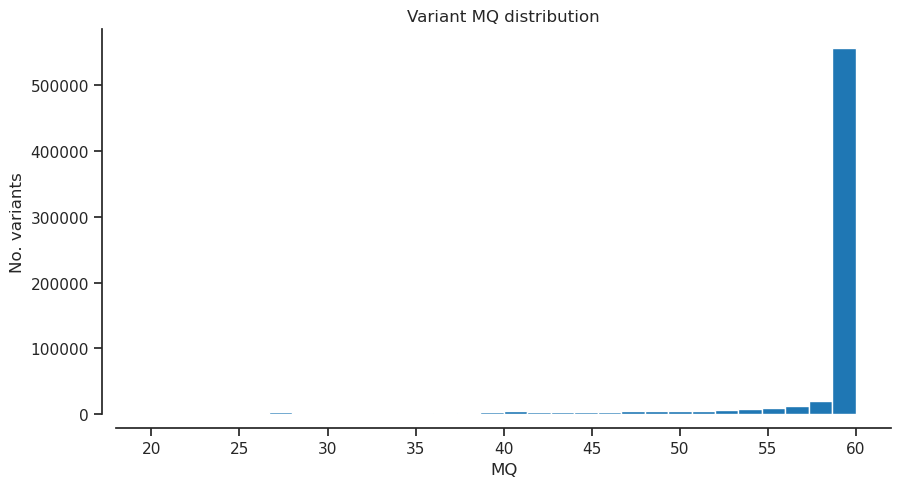

In [14]:
plot_hist('MQ','var') # RMS mapping quality

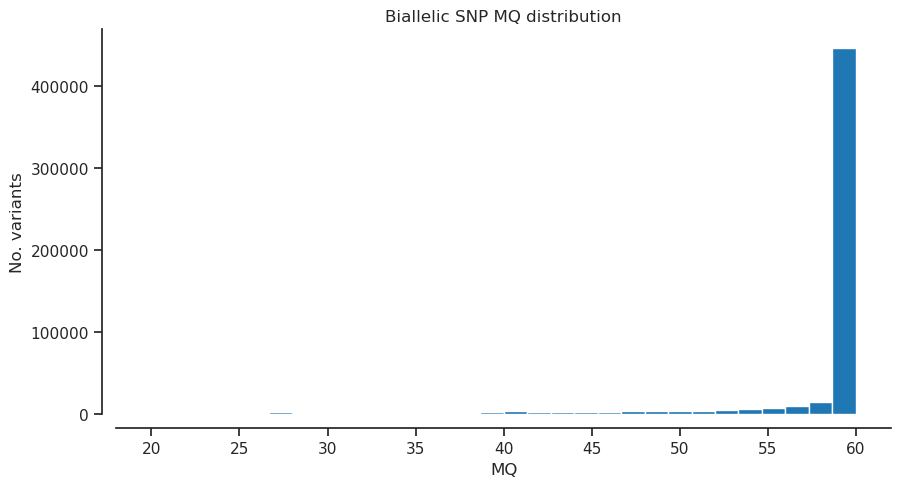

In [15]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [16]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

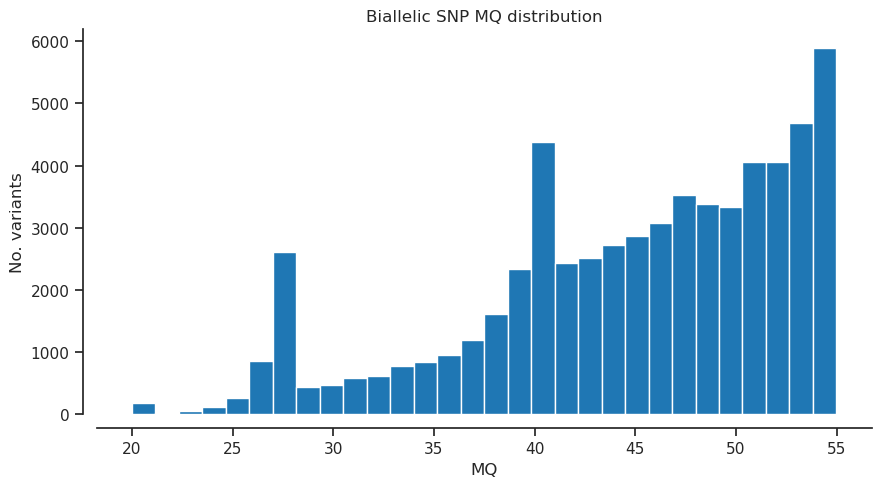

In [17]:
plot_hist('MQ')

In [18]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

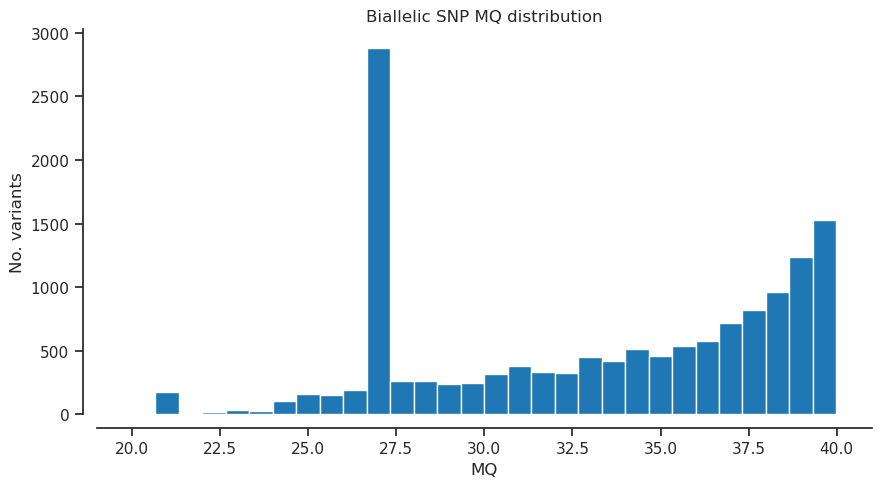

In [19]:
plot_hist('MQ')

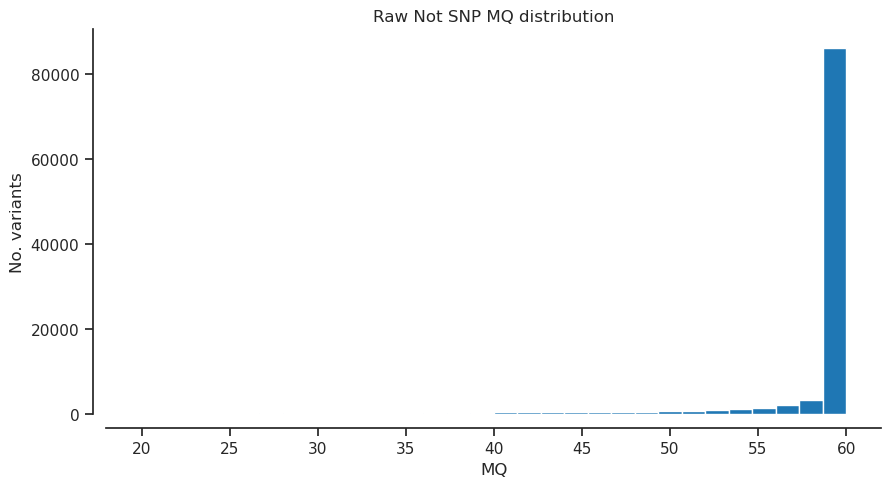

In [20]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

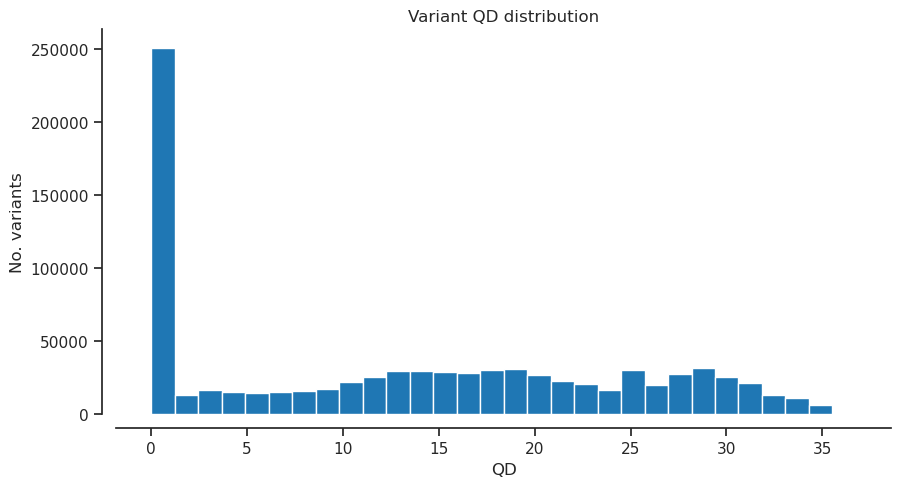

In [21]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

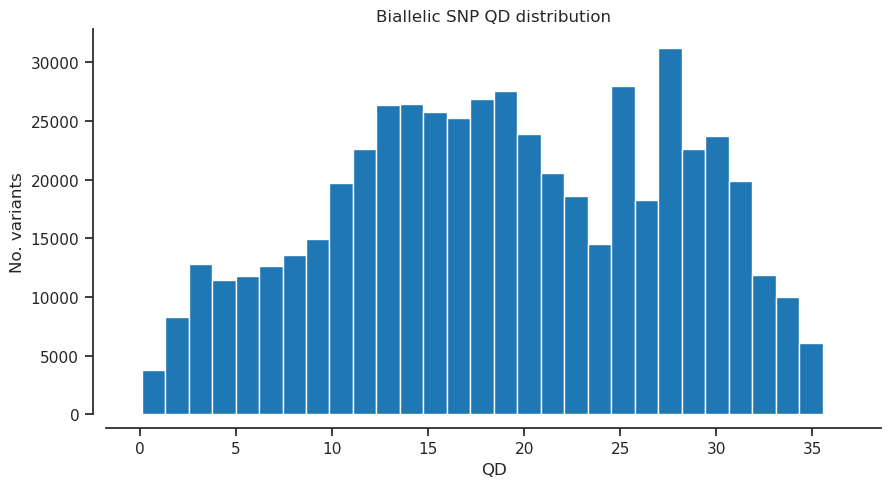

In [22]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [23]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

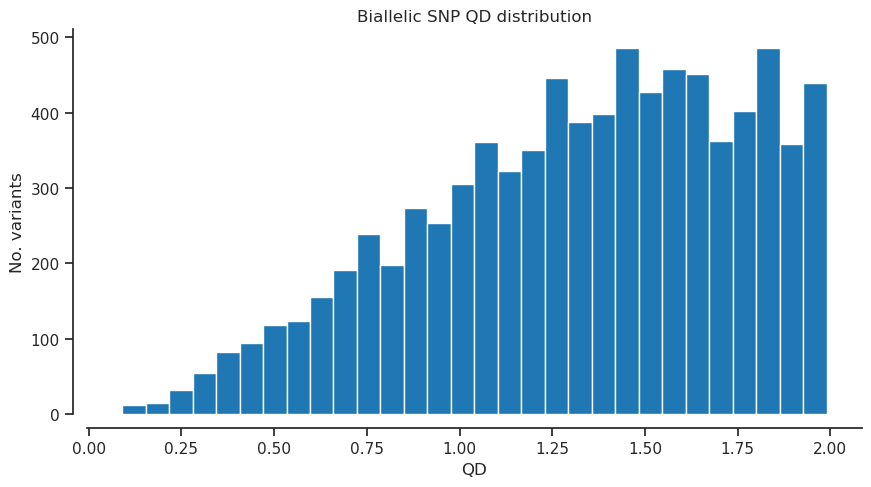

In [24]:
plot_hist('QD')

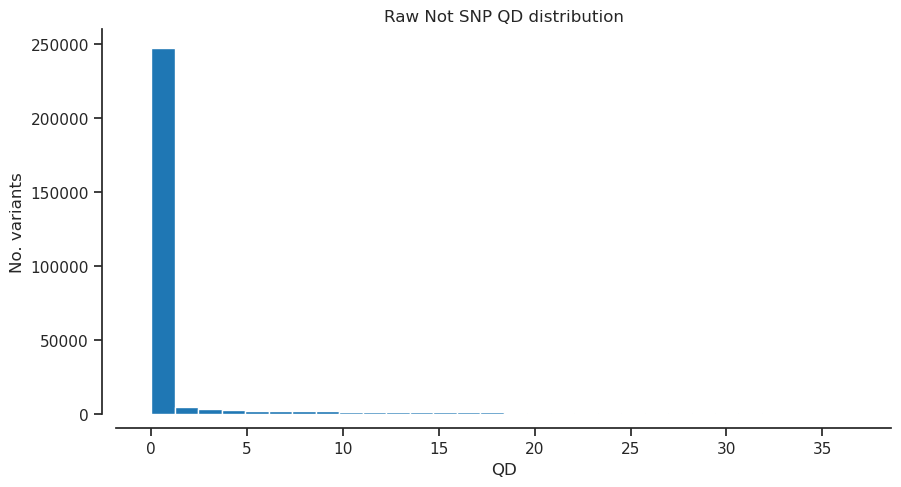

In [25]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

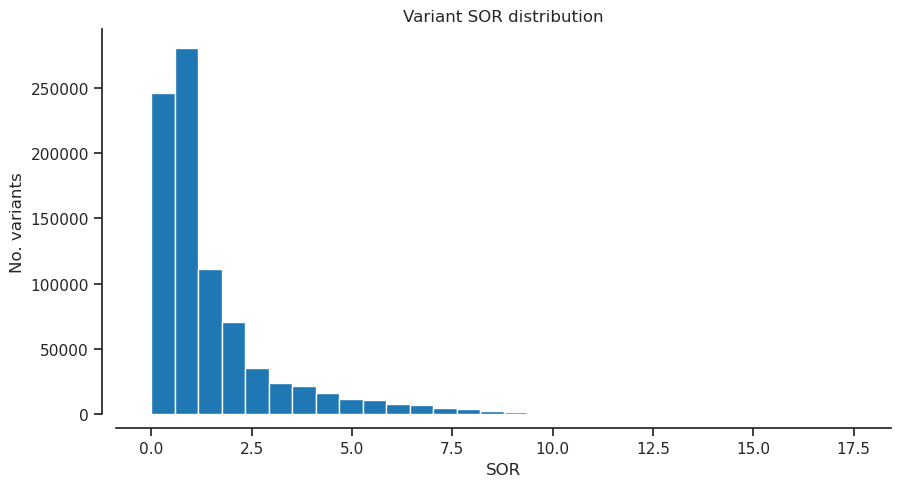

In [26]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

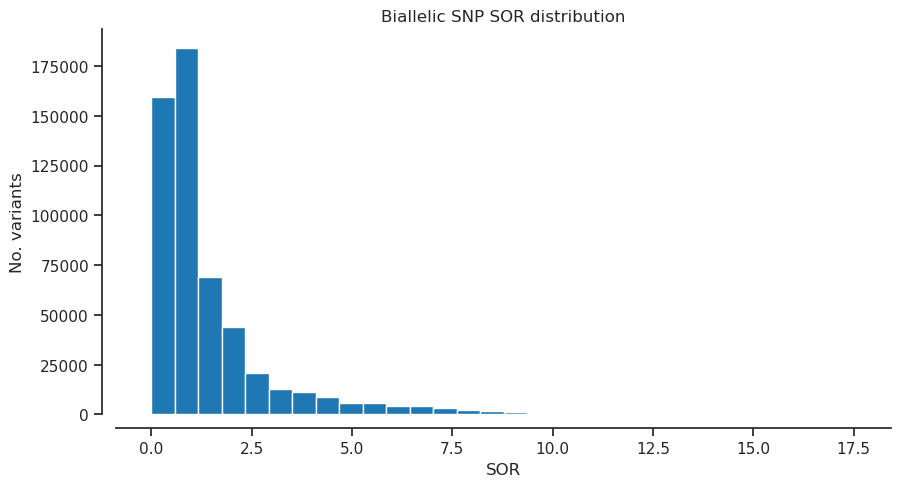

In [27]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [28]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

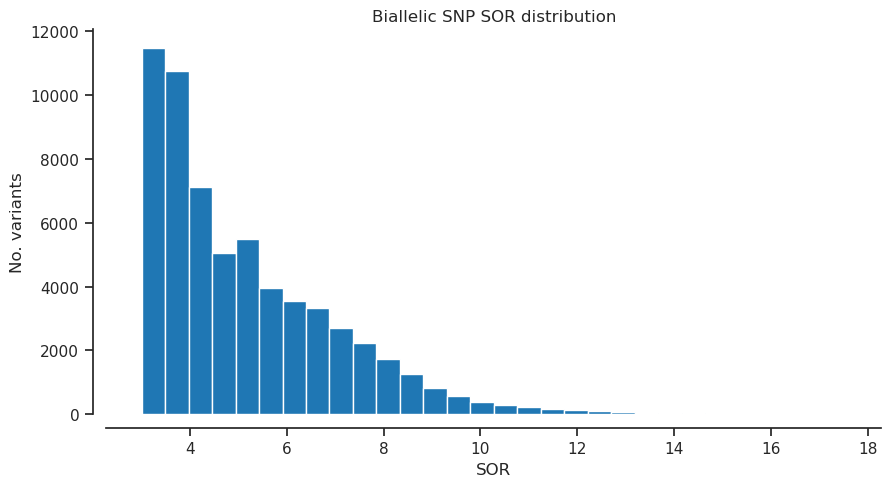

In [29]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

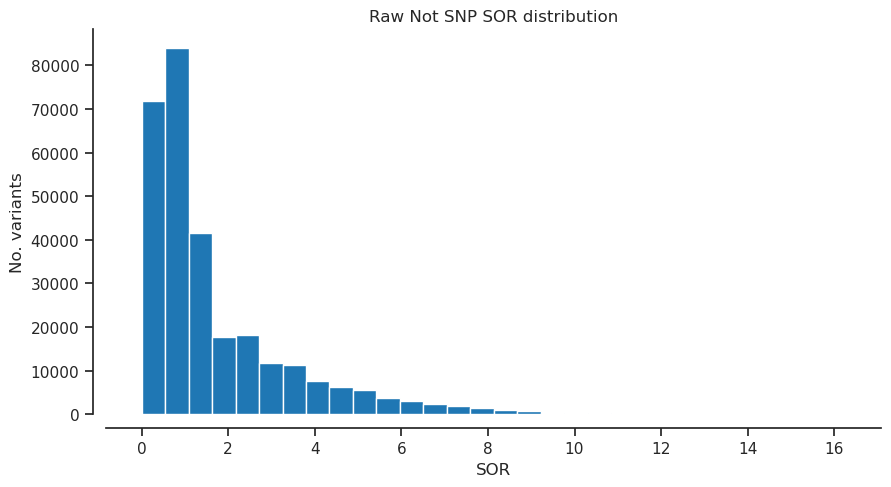

In [30]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

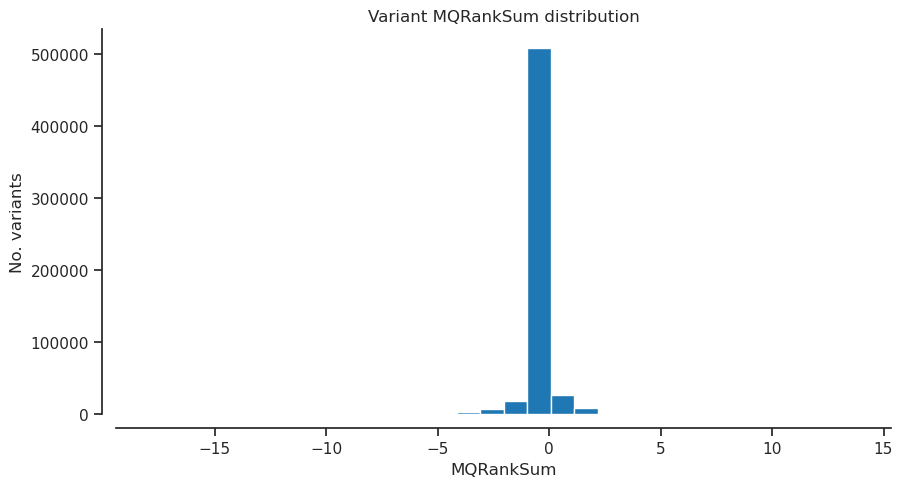

In [31]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

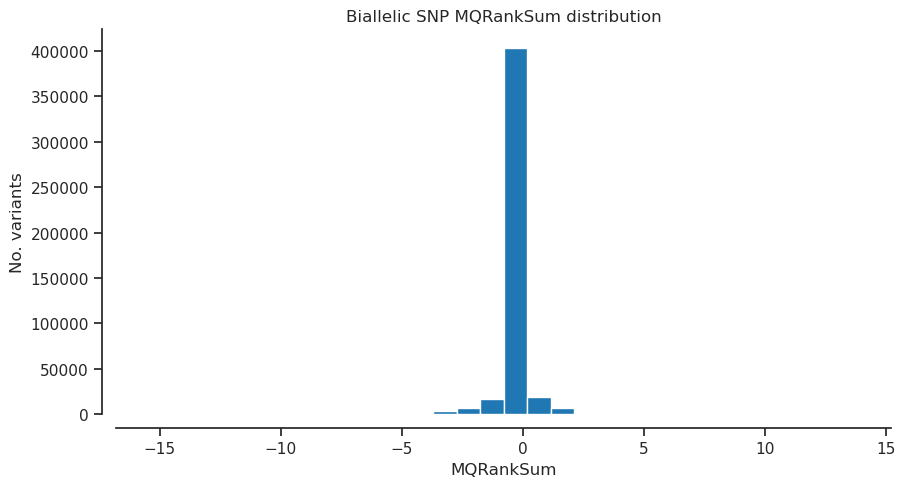

In [32]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [33]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

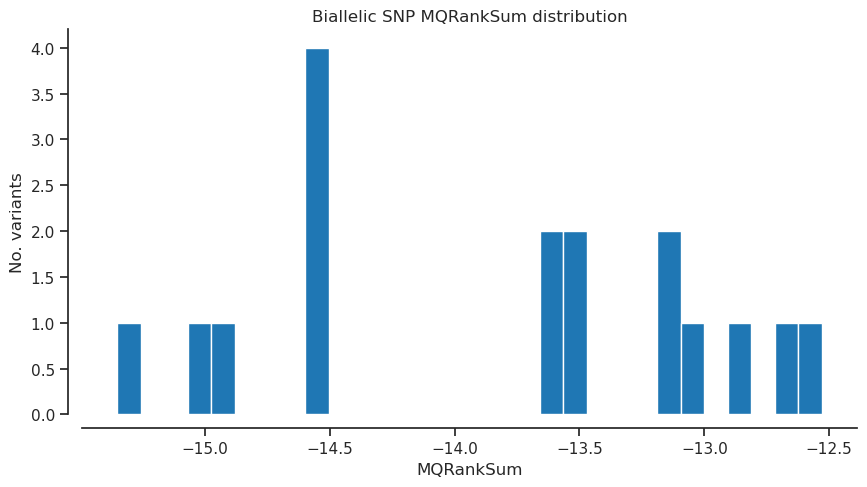

In [34]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

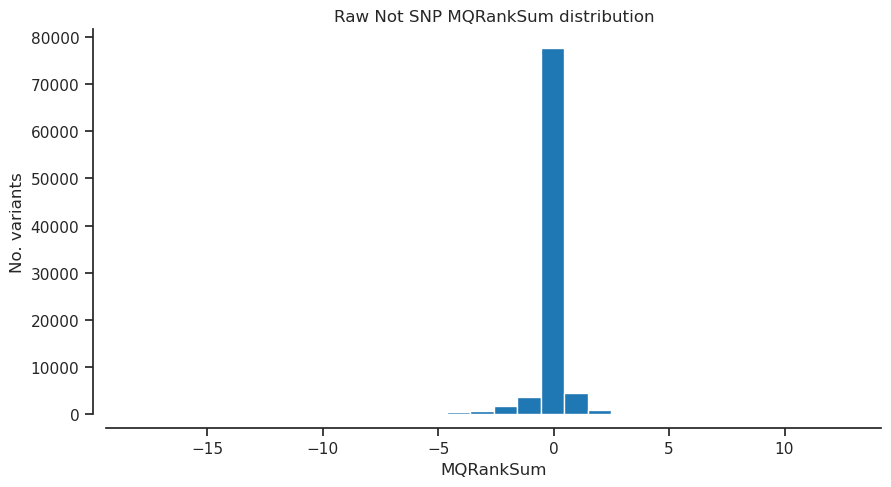

In [35]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

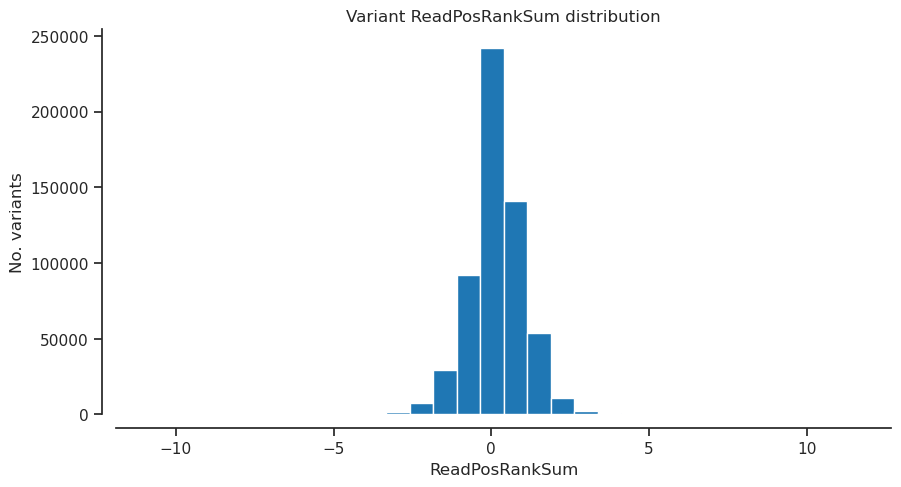

In [36]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

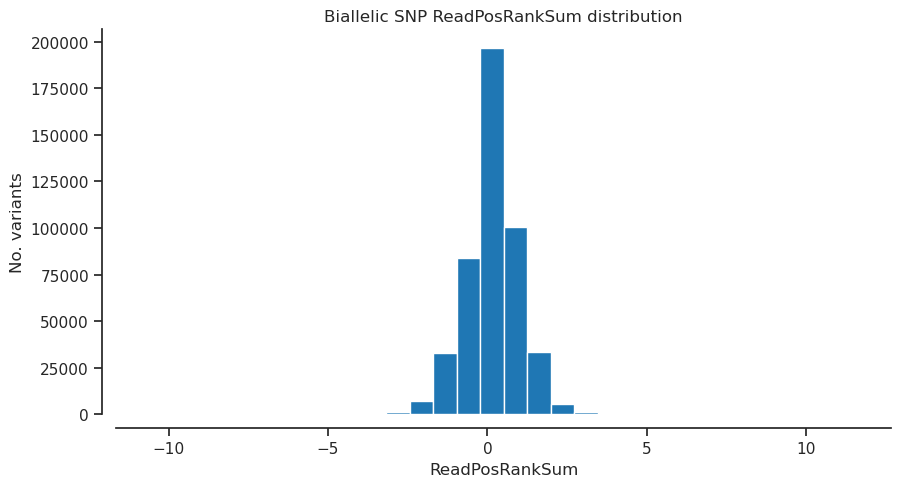

In [37]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

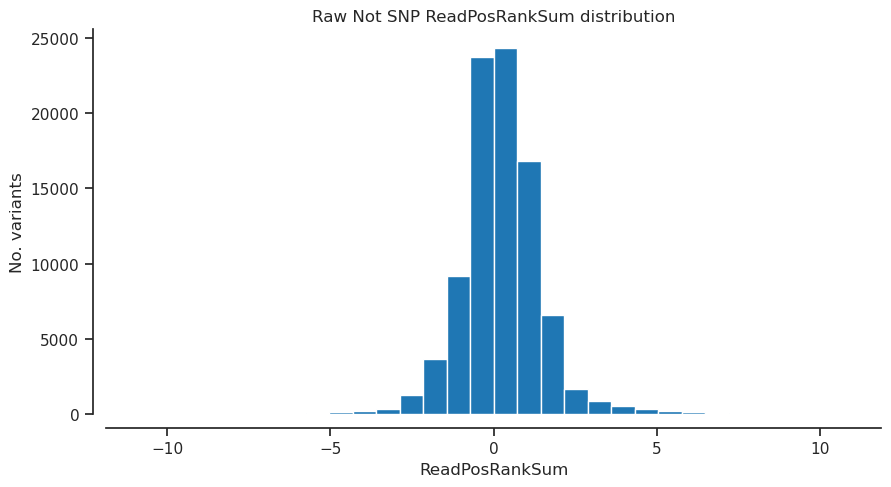

In [38]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

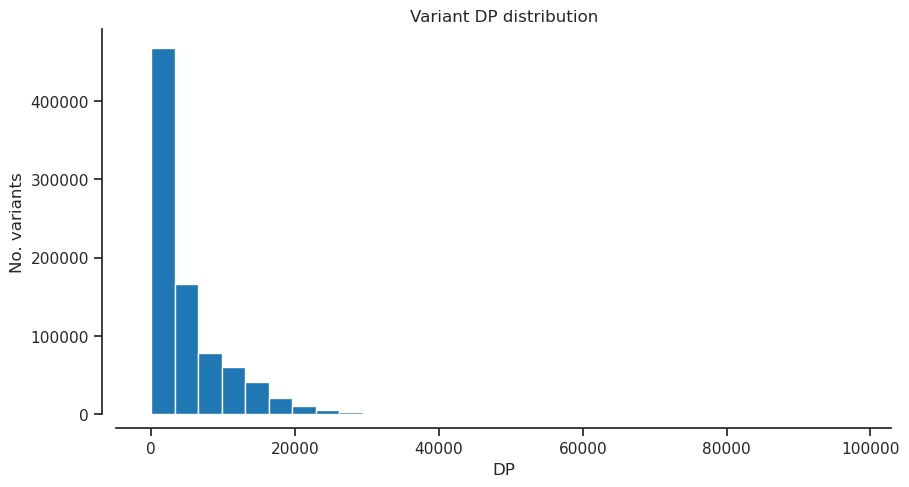

In [39]:
plot_hist('DP','var')

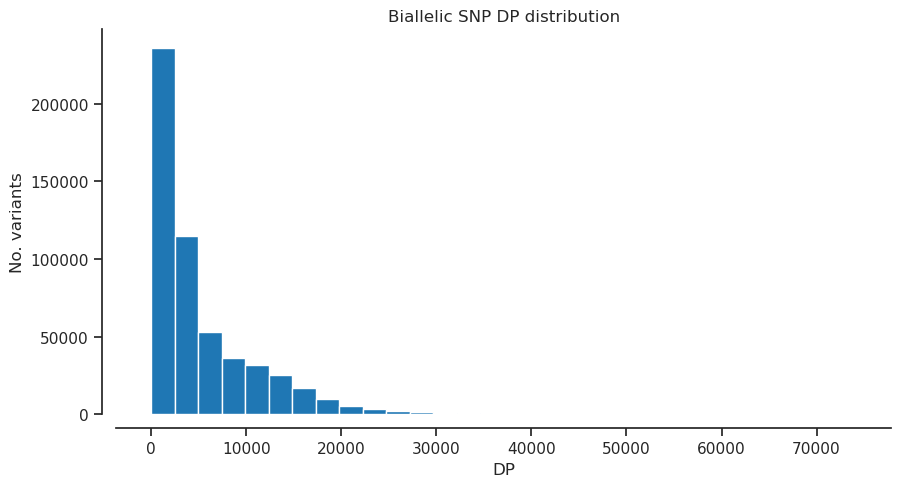

In [40]:
plot_hist('DP','biallelic')

In [41]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

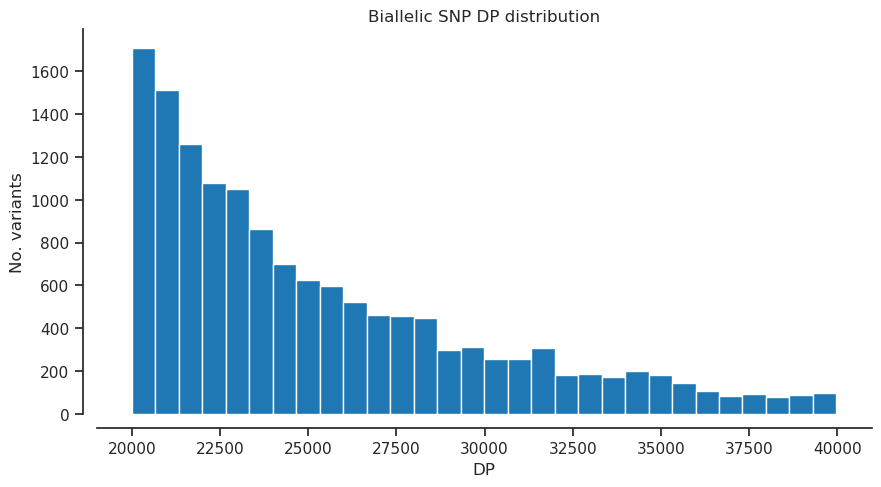

In [42]:
plot_hist('DP')

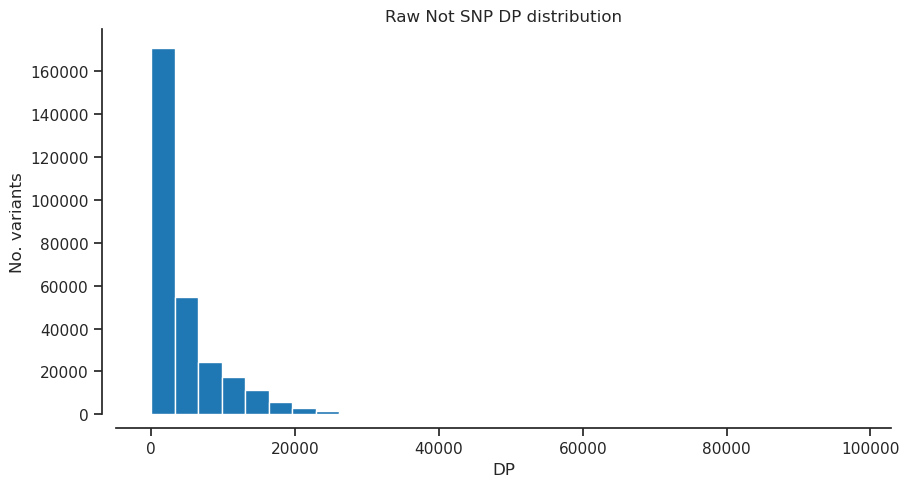

In [43]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

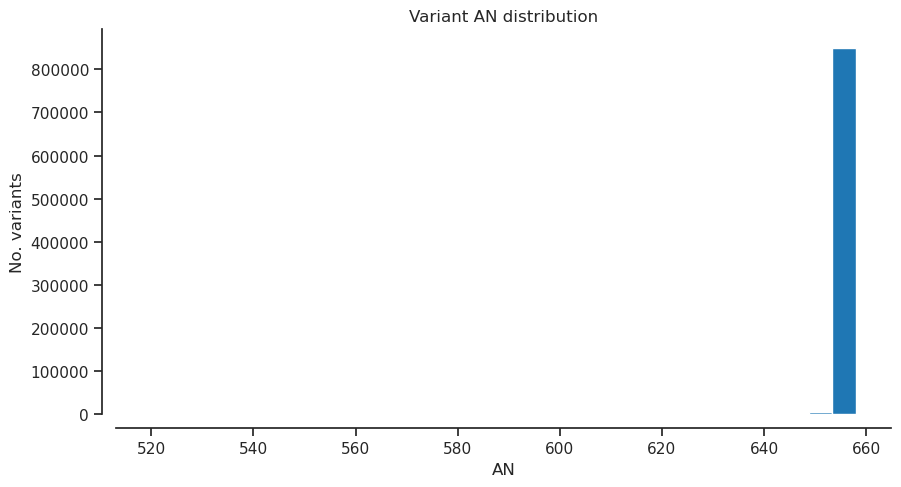

In [44]:
plot_hist('AN','var') # Total number of alleles in called genotypes

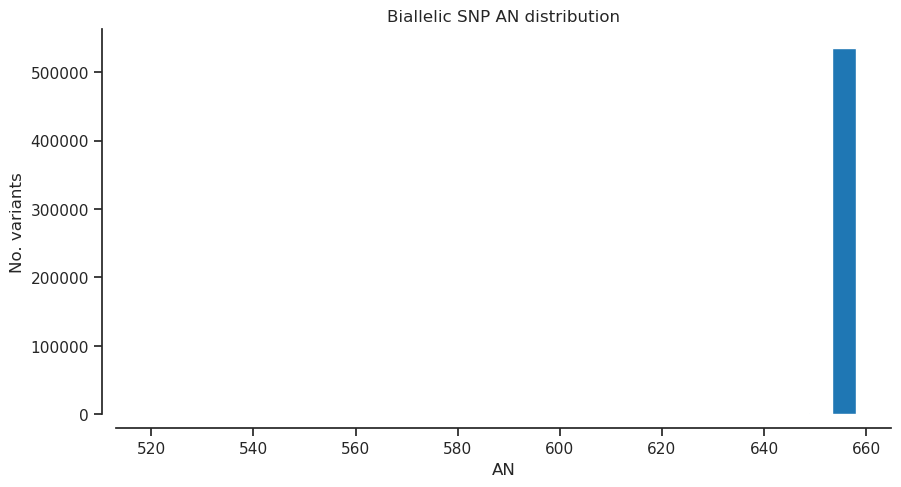

In [45]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

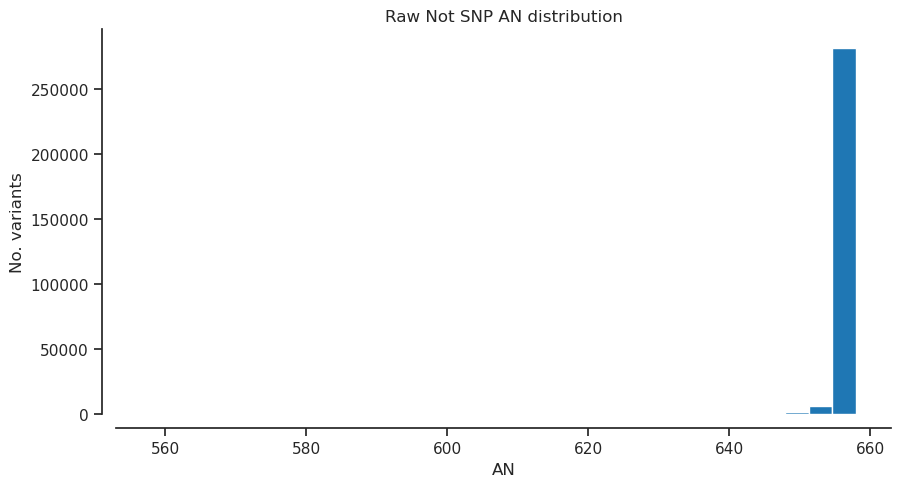

In [46]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [47]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

473343

## Genotype

In [48]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [49]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(859843, 329, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=539.6M cbytes=23.3M cratio=23.2
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [50]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(473343, 329, 2) dtype=int8 chunks=(1849, 329, 2)
   nbytes=297.0M cbytes=22.9M cratio=13.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [51]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(473343, 4) dtype=int32 chunks=(29584, 4)
   nbytes=7.2M cbytes=1.1M cratio=6.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [52]:
ac[:]

<AlleleCountsArray shape=(473343, 4) dtype=int32>
650   8   0   0
650   8   0   0
656   2   0   0
...
653   5   0   0
657   1   0   0
657   1   0   0

In [53]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[650,   8],
       [650,   8],
       [656,   2],
       ...,
       [653,   5],
       [657,   1],
       [657,   1]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

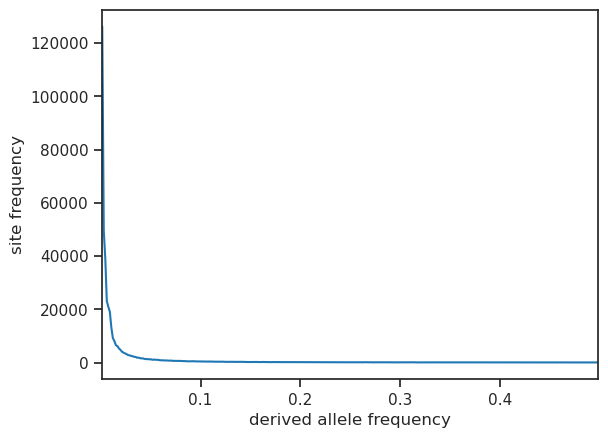

In [54]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [55]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(473343,) dtype=bool chunks=(236672,)
   nbytes=462.2K cbytes=96.7K cratio=4.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [56]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(445189, 329, 2) dtype=int8 chunks=(1740, 329, 2)
   nbytes=279.4M cbytes=20.5M cratio=13.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
n_variants = len(gt_biallelic)
n_variants

445189

In [58]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [59]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'AUT00006-001',
 b'AUT00006-002',
 b'AUT00006-003',
 b'AUT00006-004',
 b'AUT00006-005',
 b'AUT00006-006',
 b'AUT00006-007',
 b'AUT00006-008',
 b'AUT00006-009',
 b'AUT00006-010',
 b'AUT00006-011',
 b'AUT00006-012',
 b'AUT00006-013',
 b'AUT00006-014',
 b'AUT00006-015',
 b'AUT00006-016',
 b'AUT00006-017',
 b'AUT00006-018',
 b'AUT00006-019',
 b'AUT00006-020',
 b'AUT00006-021',
 b'AUT00006-022',
 b'AUT00006-023',
 b'AUT00006-024',
 b'AUT00006-025',
 b'DEU00145-001',
 b'DEU00145-002',
 b'DEU00145-003',
 b'DEU00145-004',
 b'DEU00145-005',
 b'DEU00145-006',
 b'DEU00145-007',
 b'DEU00145-008',
 b'DEU00145-009',
 b'DEU00145-010',
 b'DEU00145-011',
 b'DEU00145-012',
 b'DEU00145-013',
 b'DEU00145-014',
 b'DEU00145-015',
 b'DEU00145-016',
 b'DEU00145-017',
 b'DEU00145-018',
 b'DEU00145-019',
 b'DEU00145-020',
 b'DEU00145-021',
 b'DEU00145-022',
 b'DEU00145-023',
 b'DEU00145-024',
 b'DEU00145-025',
 b'ESP00274-001',
 b'ESP00274-002',
 b'ESP00274-003',
 b'ESP00274-004',
 b'ESP00274-005',
 b'ESP0027

In [62]:
samples_fn = '~/scratch/data/Qpetraea/Quercus_petraea_sample_list_scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,AUT00006-001,AUT00006
1,AUT00006-002,AUT00006
2,AUT00006-003,AUT00006
3,AUT00006-004,AUT00006
4,AUT00006-005,AUT00006
...,...,...
324,TUR00114-021,TUR00114
325,TUR00114-022,TUR00114
326,TUR00114-023,TUR00114
327,TUR00114-024,TUR00114


In [63]:
samples.Population.value_counts()

Population
AUT00006    25
DEU00145    25
ESP00274    25
ESP00387    25
FRA00052    25
GBR00014    25
SVN00032    25
GBR00015    25
ROU00452    25
SVN00010    25
TUR00114    25
TUR00024    25
FRA00070    17
TUR00111    12
Name: count, dtype: int64

In [64]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['AUT00006', 'DEU00145', 'ESP00274', 'ESP00387', 'FRA00052',
       'FRA00070', 'GBR00014', 'GBR00015', 'ROU00452', 'SVN00010',
       'SVN00032', 'TUR00024', 'TUR00111', 'TUR00114'], dtype=object)

## Gt frequency function

In [66]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 14)
    pop2color = {'AUT00006': palette[0],
                 'DEU00145': palette[7],
                 'ESP00274': palette[1],
                 'ESP00387': palette[8],
                 'FRA00052': palette[2],
                 'FRA00070': palette[9],
                 'GBR00014': palette[3],
                 'GBR00015': palette[10],
                 'ROU00452': palette[4],
                 'SVN00010': palette[11],
                 'SVN00032': palette[5],
                 'TUR00024': palette[12],
                 'TUR00111': palette[6],
                 'TUR00114': palette[13]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[13])]
    ax.legend(handles=handles, labels=['AUT00006', 'DEU00145', 'ESP00274', 'ESP00387', 'FRA00052', 'FRA00070',
       'GBR00014', 'GBR00015', 'ROU00452', 'SVN00010',
       'SVN00032', 'TUR00024', 'TUR00111', 'TUR00114'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

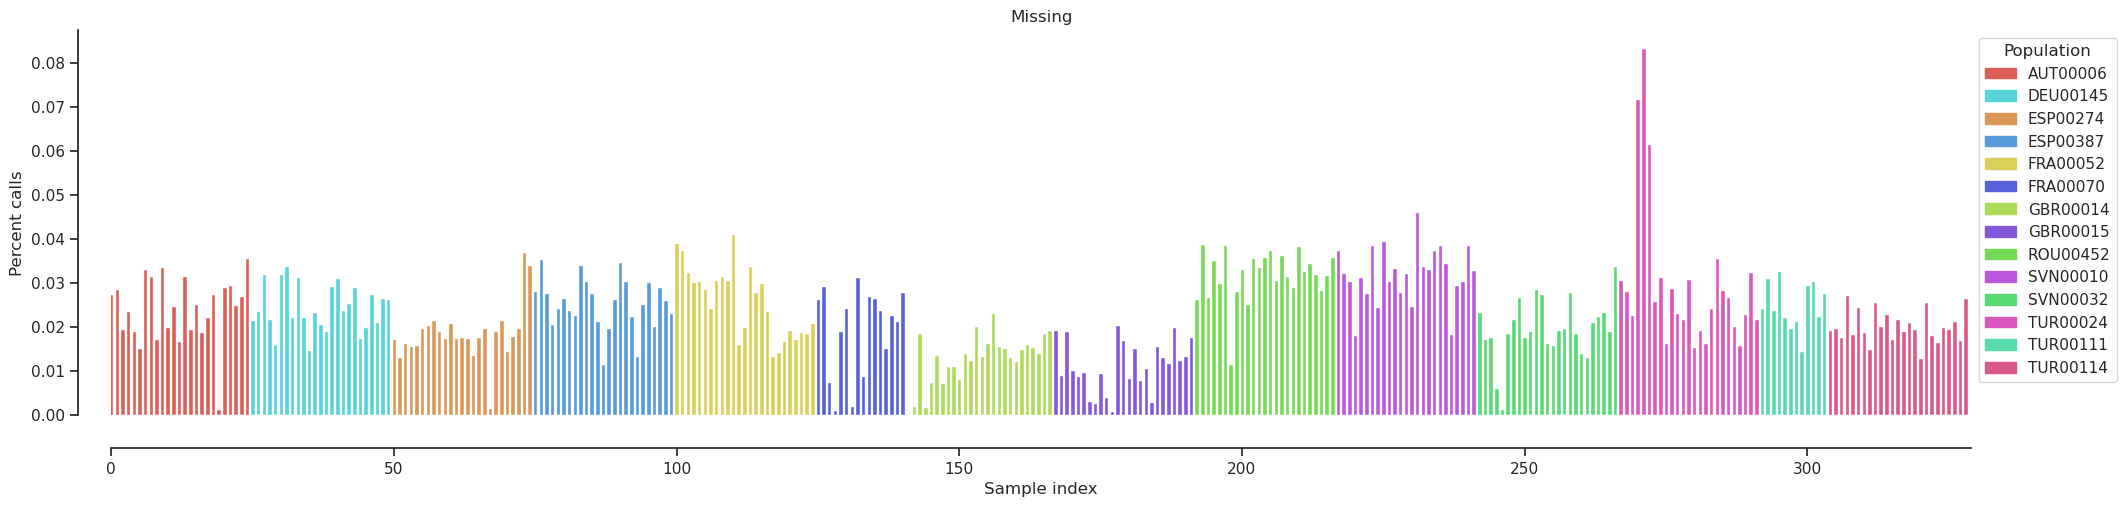

In [67]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

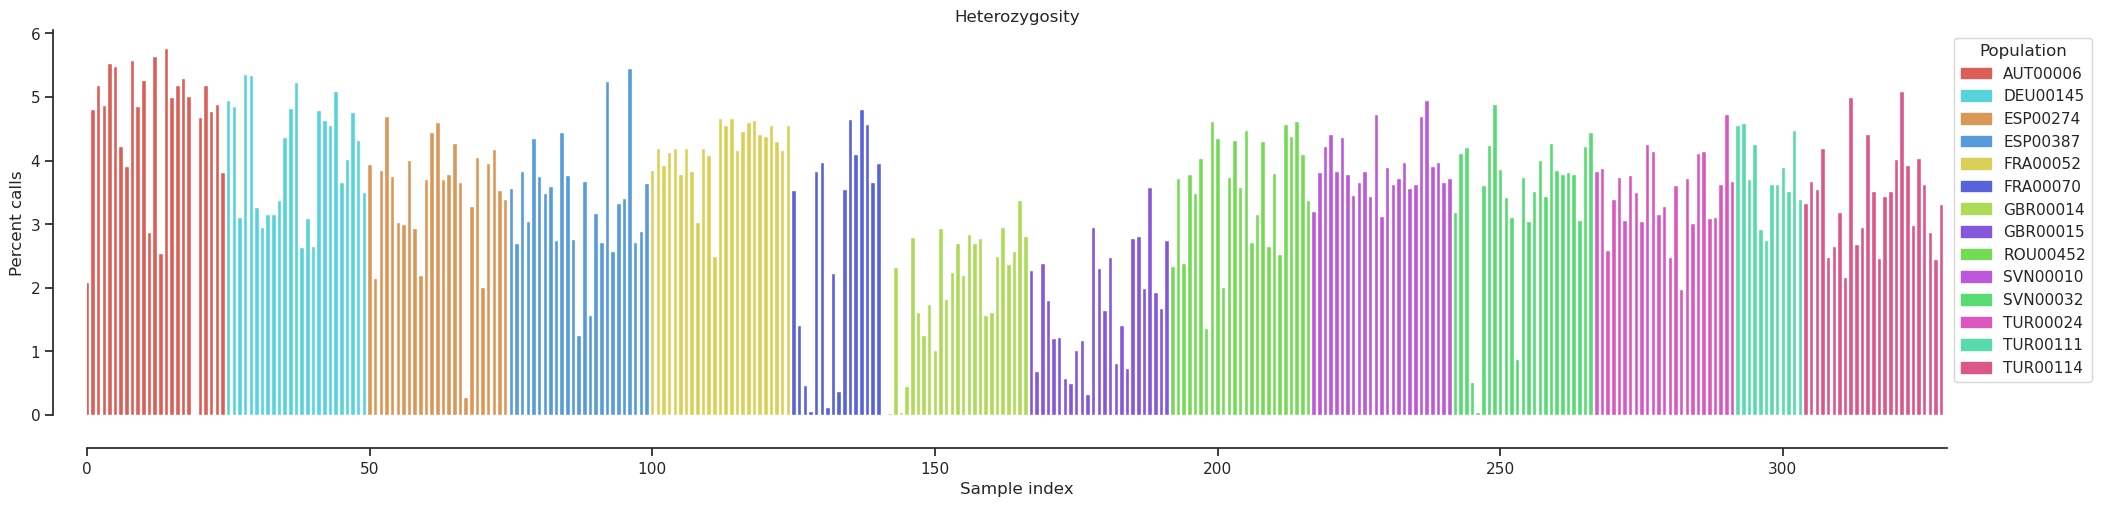

In [68]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [69]:
palette = sns.color_palette("hls",14)
pop_colours = {    
                'AUT00006': palette[0],
                 'DEU00145': palette[7],
                 'ESP00274': palette[1],
                 'ESP00387': palette[8],
                 'FRA00052': palette[2],
                 'FRA00070': palette[9],
                 'GBR00014': palette[3],
                 'GBR00015': palette[10],
                 'ROU00452': palette[4],
                 'SVN00010': palette[11],
                 'SVN00032': palette[5],
                 'TUR00024': palette[12],
                 'TUR00111': palette[6],
                 'TUR00114': palette[13]
}

In [70]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [71]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(445189, 2) dtype=int32 chunks=(55649, 2)
   nbytes=3.4M cbytes=821.3K cratio=4.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [72]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(318973, 329) dtype=int8 chunks=(2492, 329)
   nbytes=100.1M cbytes=14.1M cratio=7.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [73]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

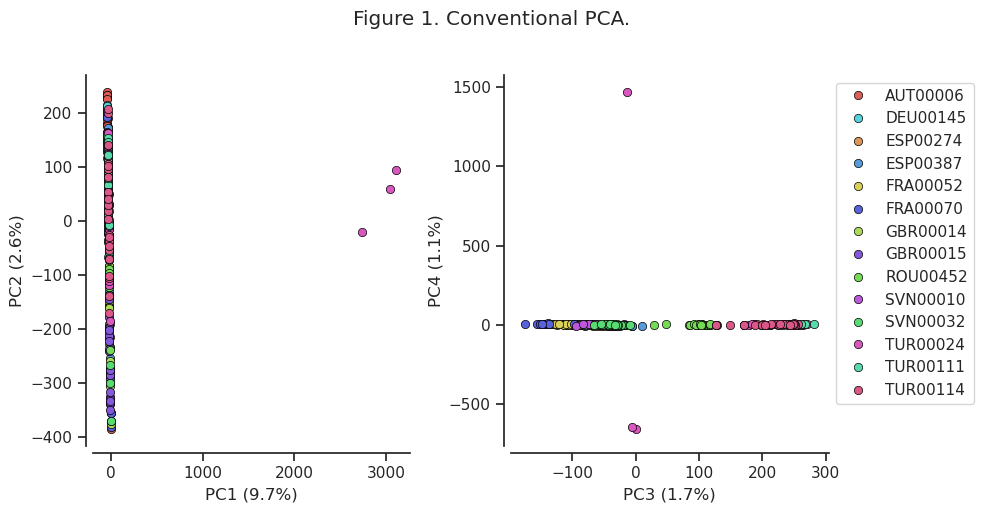

In [74]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [75]:
outliers = coords1[:,0]>2000
samples[outliers]

,ID,Population
270,TUR00024-004,TUR00024
271,TUR00024-005,TUR00024
272,TUR00024-006,TUR00024
